In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("1-studyhours.csv")

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [5]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


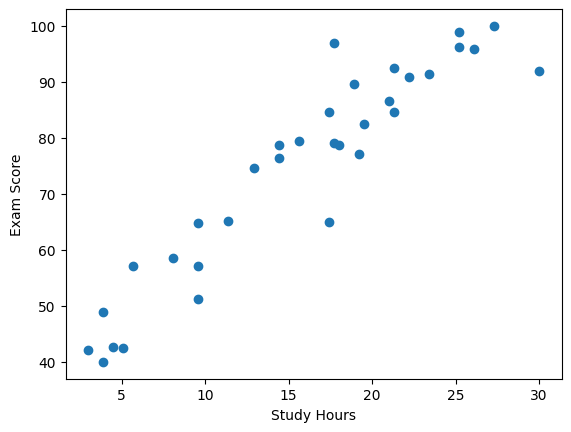

In [7]:
plt.scatter(df['Study Hours'], df['Exam Score'])
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')

plt.show()

In [8]:
# independent and dependent features --->> burada onemli bir konu var. X'leri yani girdileri her zaman dataframe olarak ver.

#[['Study Hours']] → 📦 Bu bir dataframe, içinde sütun var → ✅
#['Study Hours'] → 📃 Bu sadece liste → ❌ model hata verir


X=df[['Study Hours']]
y=df['Exam Score']

In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
type(y)

pandas.core.series.Series

In [11]:
# test - train  split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

In [15]:
y_train  #----> bu bir series unutma, y ciktiyi sonucu elde edecegimiz yer.

18     64.9
1      57.1
2      42.7
32     89.6
6      77.1
3      65.1
29     82.4
26     64.8
9      84.6
4      78.7
28     79.1
10     92.4
27     79.5
13    100.0
17     74.7
15     97.0
22     76.5
31     96.2
11     95.9
7      90.8
0      40.0
23     42.2
5      78.8
12     92.0
21     58.5
8      99.0
Name: Exam Score, dtype: float64

In [18]:
type(y_train)

pandas.core.series.Series

In [17]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [19]:
type(y_test)

pandas.core.series.Series